<h1 style="font-family:verdana;"> <center>📚Crab Age Notebook : EDA and Baseline models 📚</center> </h1>
<p><center style="color: crimson; font-family:cursive;">One notebook that make you a better kaggler</center></p>

***

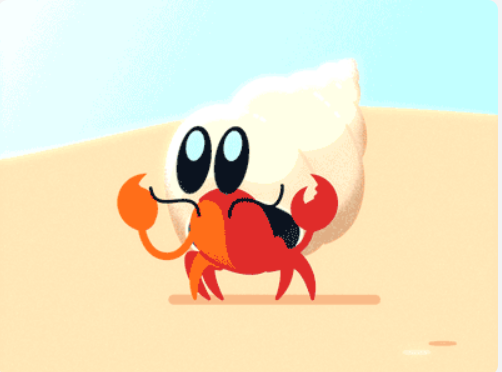

<div style="font-family:verdana;">
    <span style="color:crimson;">Crab Life Span</span>
The average lifespan of a crab is between three to five years. However, this greatly depends on the species of the crab. There are many different crab species, and their age ranges all vary.</p><br>
    
<div style="font-size:15px; font-family:verdana;">Let’s compare the average lifespan of different well-known crab species:<br><br>

<ol>
    <li>King Crab: Red king crabs can live up to 20-30 years in the wild.</li>
    <li>Snow Crab: Snow crabs may live for up to 20 years, according to scientists.</li>
    <li>Blue Crab: Blue crabs often live for three to four years. They mature between 12 and 18 months. Water temperature influences growth rates. They develop faster in warmer water.</li>
    <li>Dungeness Crab: Dungeness crabs live for an average of ten years.</li>
</ol>

Species such as the Coenobita clypeatus may live for up to 20 years if properly cared for, and some have lived for up to 32 years.

https://a-z-animals.com/blog/crab-lifespan-how-long-do-crabs-live/
    
</div>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            I am happy to tell you this is first EDA notebook, as I am also a beginner and on my learning journey as most of you. I just want to share something that I was learning from past 2 months, which may be useful for many kagglers working hard for the competitions. If you find this notebook useful in anyway, please upvote it so that it can reach a bigger audience. You can share it with your fellow kagglers.
        </p>
    </div>
    </p>
</div>
<br><br>
<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 Finally, I would like to take this opportunity to remind everyone to be <code>kind</code>, <code>happy</code> and <code>helpful</code>😃</p></blockquote>

***

<h1 style="font-family:verdana;"> <center>1. Importing Dependencies </center> </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc

from tqdm.auto import tqdm
import math
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')


from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

***

<h1 style="font-family:verdana;"> <center>2. Importing Data</center> </h1>

In [2]:
submission = pd.read_csv("/kaggle/input/playground-series-s3e16/sample_submission.csv")
train_data = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
test_data = pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")
original_data = pd.read_csv('/kaggle/input/crab-age-prediction/CrabAgePrediction.csv')

<h1 style="font-family:verdana;"> <center>3. Understanding Train_Data</center> </h1>

In [3]:
train_data.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">.head() is used to see the <span style="color:crimson;">Initial 5 rows</span> of any data</p><br>

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">As we can see easily, we only have <span style="color:crimson;">["Sex"]</span> as a categorial data,and everything else is in numeric type. In the future we have to to change non-numeric feature into numeric form using various encoding so that model perform better</p><br>


In [5]:
train_data.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">As we can see easily, we don't have any <span style="color:crimson;">missing</span> values, hence you are free from this curse.</p><br>


In [6]:
train_data.shape

(74051, 10)

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Using this code, one can easily see the <span style="color:crimson;">size-matrix</span> of any data</p><br>

In [7]:
train_data.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Using this code, one can easily see the <span style="color:crimson;">mathematical prospects</span> of any data</p><br>

In [8]:
train_data.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [9]:
# Selecting numerical and categorical variables separatly.

nums_columns = train_data.select_dtypes(include=['float64']).columns.tolist()
cat_columns = train_data.select_dtypes(include=['object']).columns.tolist()
features = nums_columns + cat_columns

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Dividing the whole data features based on the different data type: <span style="color:crimson;">Mainy into numeric and categorial data</span> </p><br>

In [10]:
# Numerical Features

nums_columns

['Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight']

In [11]:
# Categorial Features

cat_columns

['Sex']

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="image">
         <span style="color:crimson;">Factors that Influence Crab Life</span>
    </h1>
    <br>
    <p style="line-height:1.7em;">
        Several factors could influence our capacity to sustain a healthy crab population.

These factors include:</code>.<br><br>
        "Loss of habitat: Underwater grass beds provide safe haven for juvenile crabs from predators. The loss of these grasses means a loss of nursery habitat for many crab species. Young crabs utilize shallow water habitat near marshes and wooded regions to locate shelter, and the loss of this habitat has a negative influence on their survival chances."

"Predators: Crabs are preyed upon by a plethora of predators in the water. Their predators include anything from fish and birds to sea animals like sharks, dolphins, and porpoises. Even octopuses snack on them. As we know, humans also indulge in eating crabs."

"Climate change: Changing water temperatures may affect predator numbers, prey availability, and winter mortality. Sea level rise may have an impact on nursery and foraging environments. Changes in precipitation may increase regions of low dissolved oxygen, reducing foraging resources and limiting the quantity of appropriate habitat for the crabs to live in."

https://a-z-animals.com/blog/crab-lifespan-how-long-do-crabs-live/<br><br>

<h1 style="font-family:verdana;"> <center>4. Exploratory Data Analysis</center> </h1>

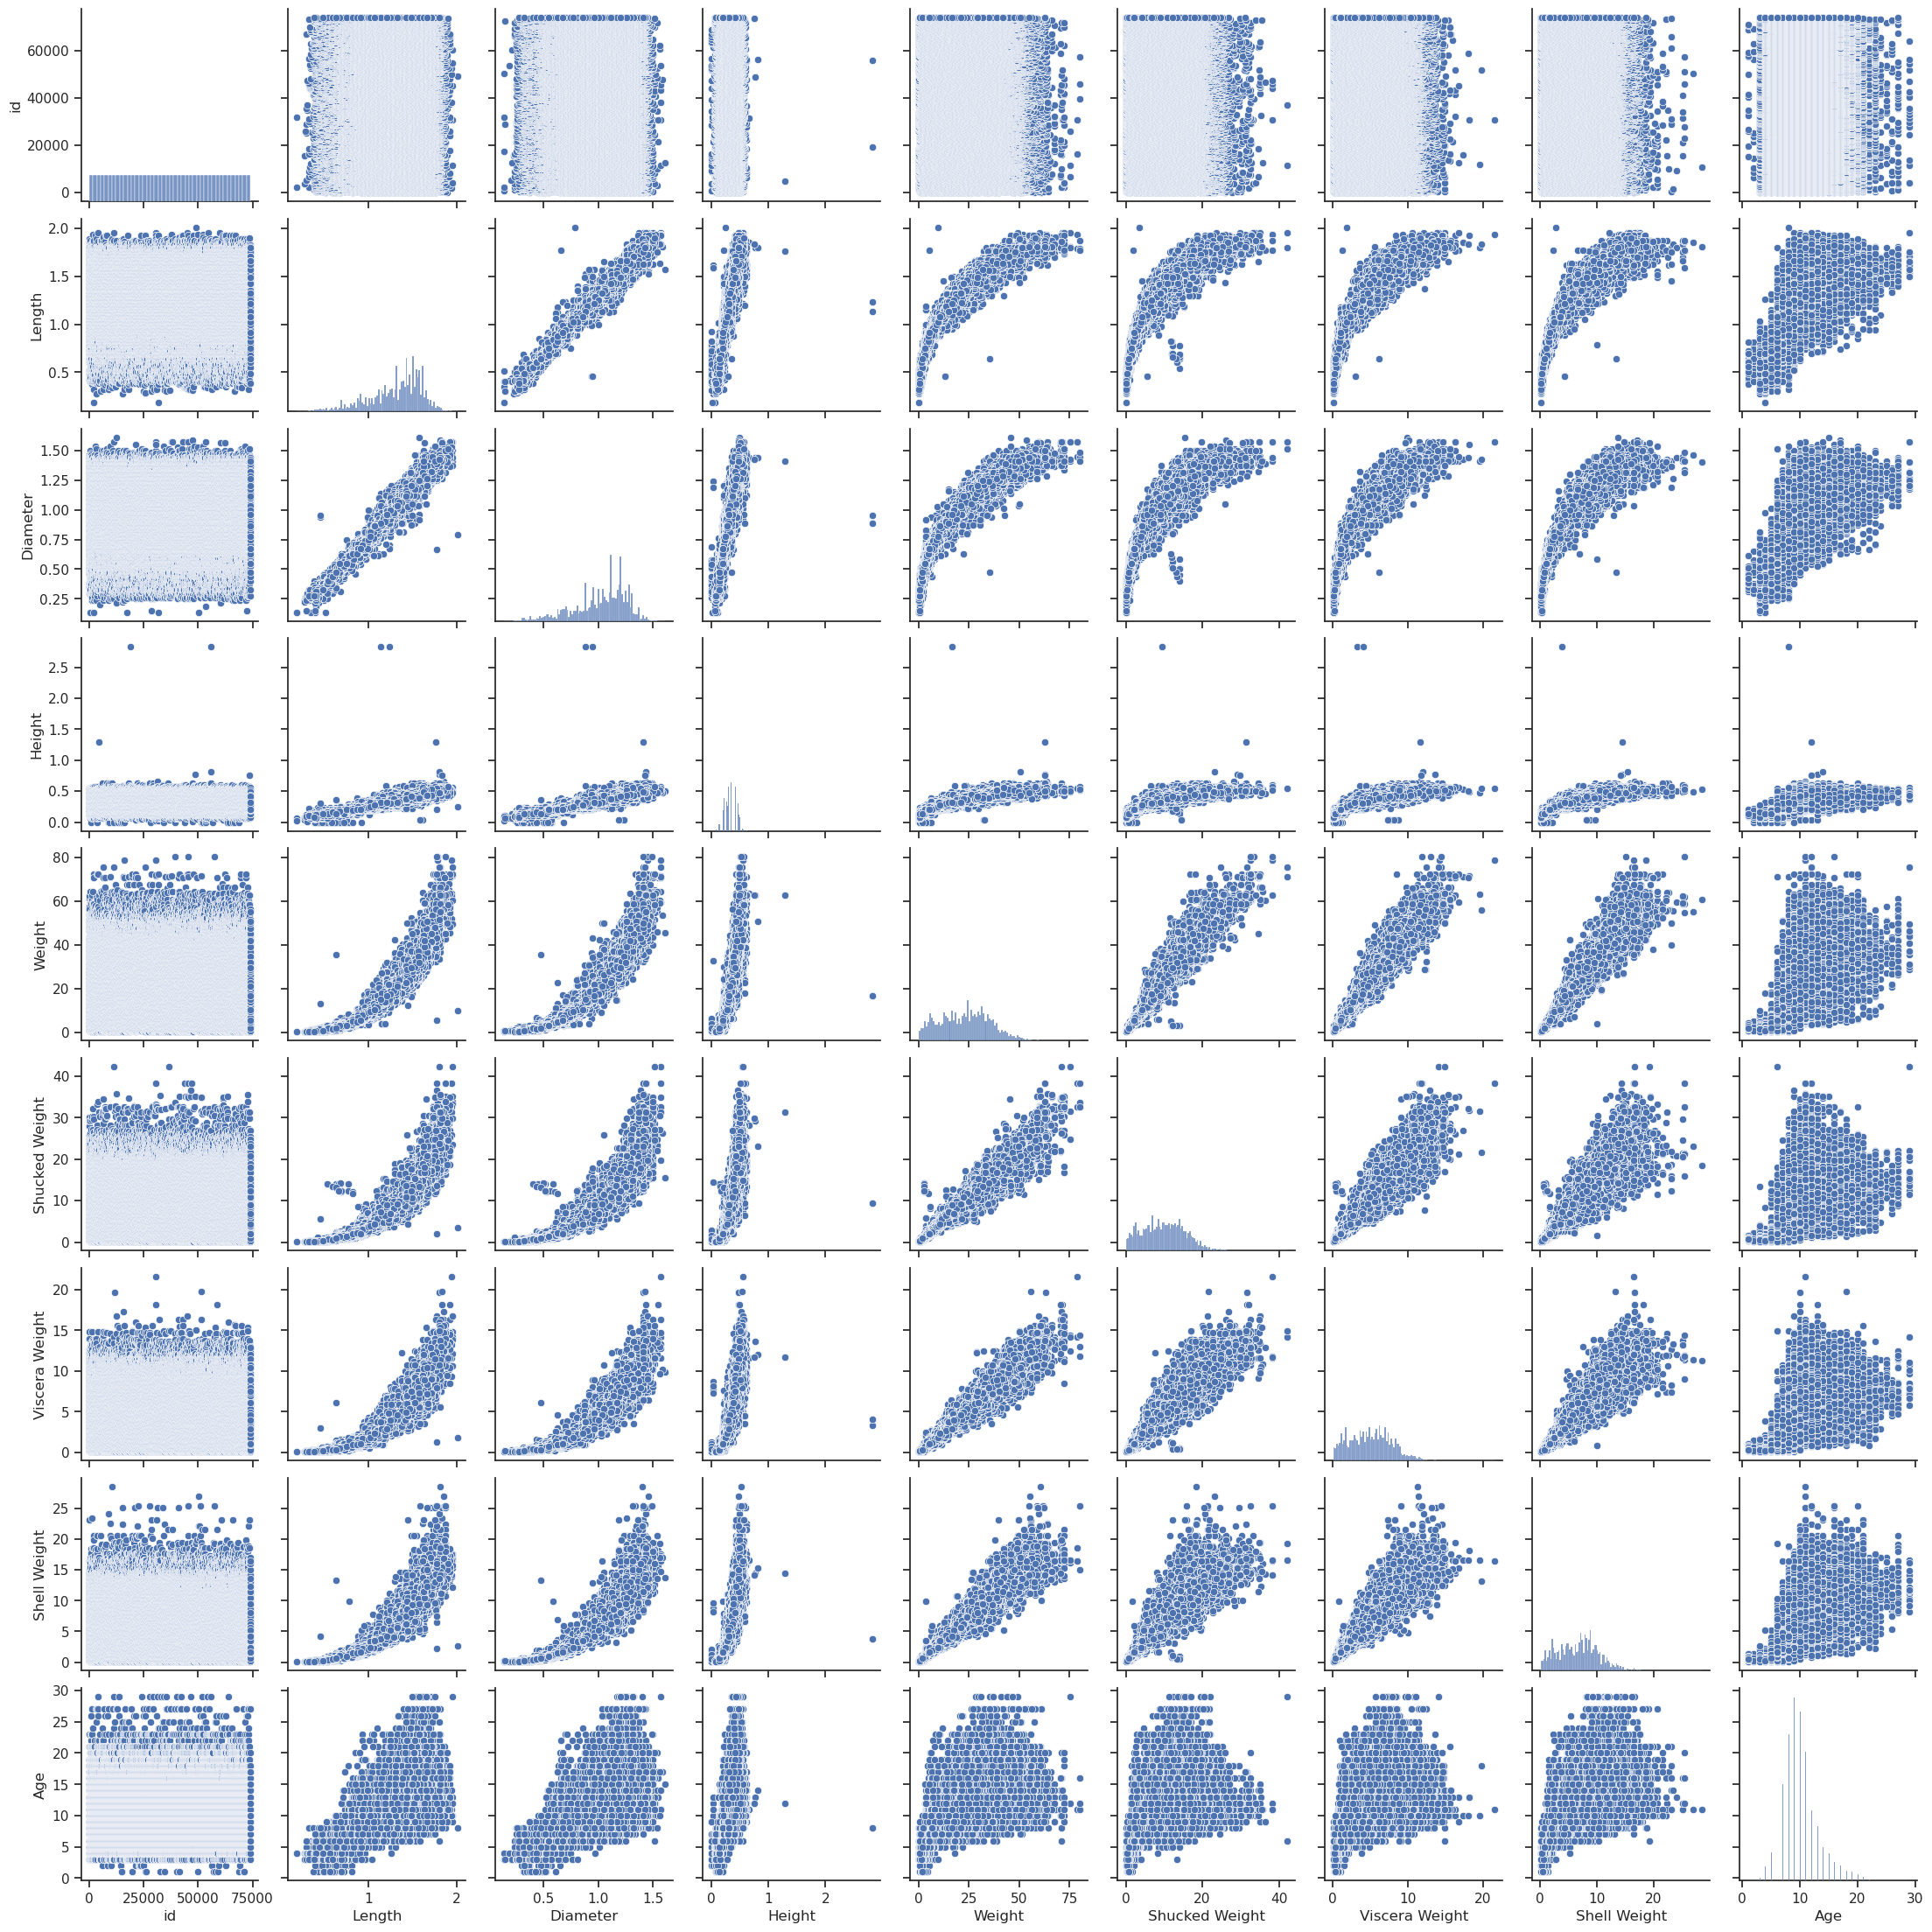

In [12]:
# Set the style of the plot (optional)
sns.set(style="ticks")

# Generate the pairplot
sns.pairplot(train_data)

# Display the plot
plt.show()

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>],
       [<Axes: title={'center': 'Viscera Weight'}>,
        <Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

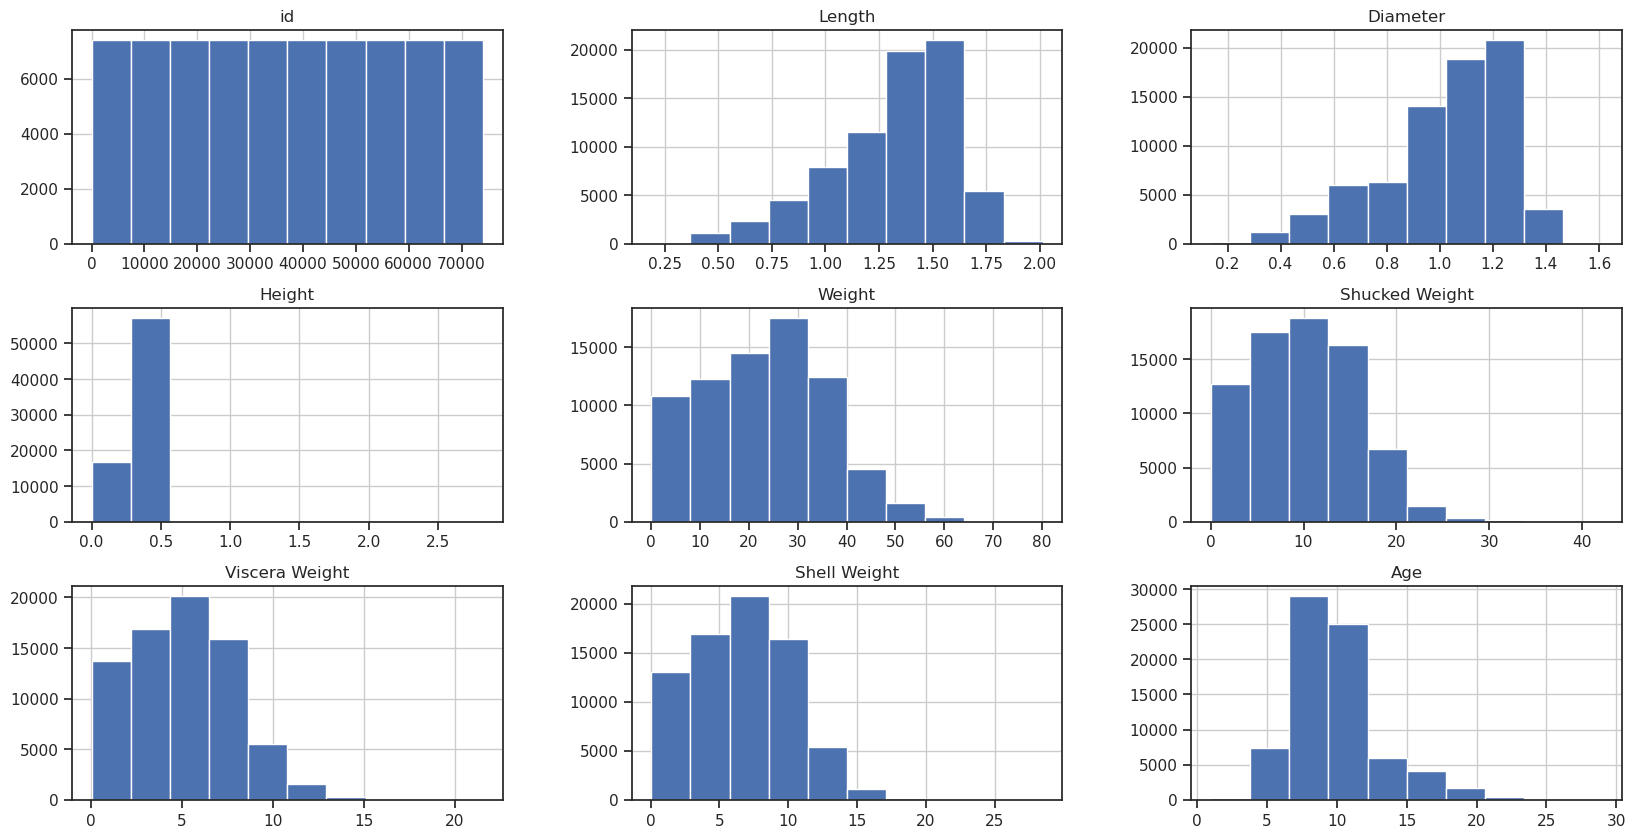

In [13]:
train_data.hist(figsize = (20, 10))

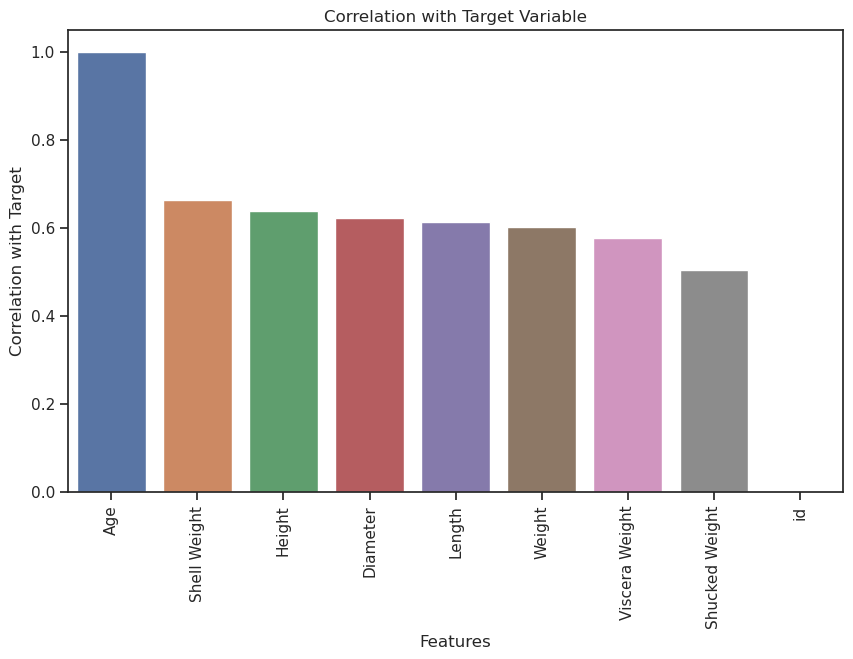

In [14]:
# Calculating the correlation matrix

correlation_matrix = train_data.corr()
correlation_with_target = correlation_matrix['Age'].sort_values(ascending=False)

# Create a bar chart of the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Correlation with Target')
plt.title('Correlation with Target Variable')
plt.show()

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Correlation Matrix help us to see the correlation of the features with each other: <span style="color:crimson;">As we can see ["Shell Weight"] is highly correlated with age of the crab</span> in the given data</p><br>

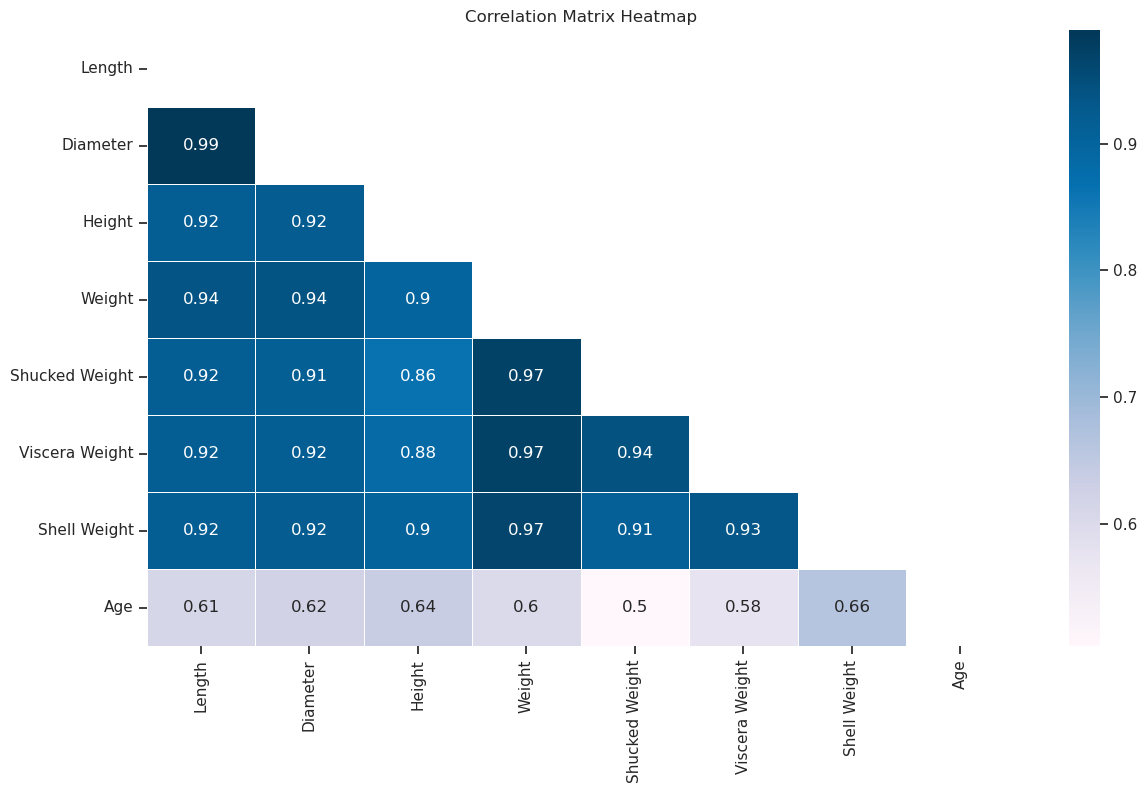

In [15]:
corr = train_data.drop('id', axis=1).corr()  # Excluding the 'id' column

# Create a correlation matrix heatmap with masking and custom colormap
fig, axes = plt.subplots(figsize=(14, 8))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, linewidths=.5, cmap='PuBu', annot=True)

# Set the title of the heatmap
title_name = "Correlation Matrix Heatmap"
plt.title(title_name)
plt.show()

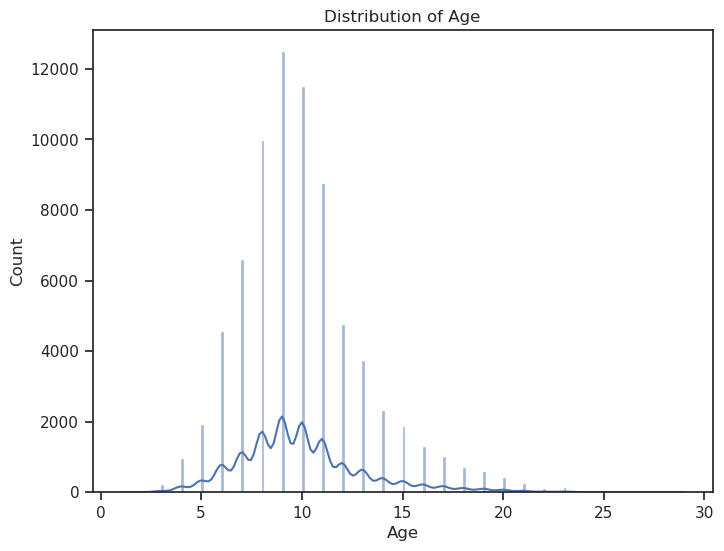

In [16]:
# Distribution of Age

plt.figure(figsize=(8, 6))
sns.histplot(data= train_data, x='Age', kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

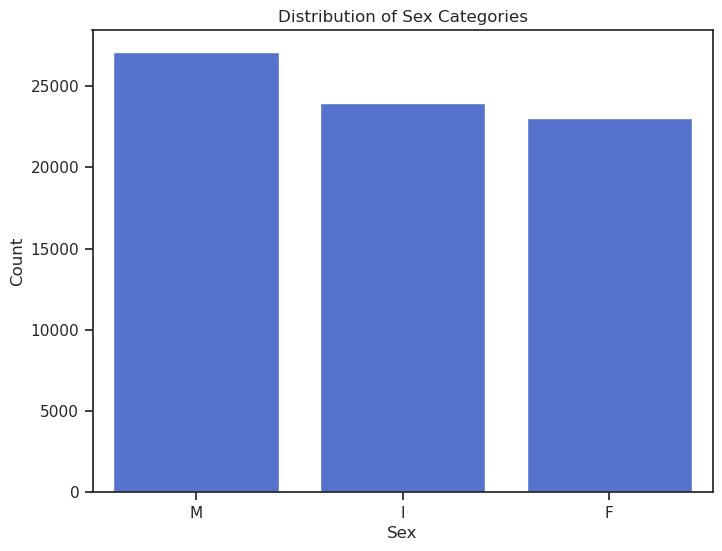

In [17]:
sex_counts = train_data['Sex'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, color='#4169e1')
plt.title('Distribution of Sex Categories')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [18]:
# Dealing with "Sex" categorial data, using a One Hot Encoding

train_data = pd.get_dummies(train_data, columns = ["Sex"])
test_data = pd.get_dummies(test_data, columns = ["Sex"])


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">One Hot Encoding is popularly used to <span style="color:crimson;">convert categorial data into numeric data.</span> It created different features for every unique value of data, and encode them with 0 and 1.</p><br>

<h1 style="font-family:verdana;"> <center>5. Baseline Models</center> </h1>

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="image">
         <span style="color:crimson;">(a) Lets start with Cat</span>
    </h1>
    <br>

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor

cv_scores_cat = []
importance_cat = []

# Assuming 'train_df' is your DataFrame, and 'Age' is your target column
X = train_data.drop('Age', axis=1)
Y = train_data['Age']

## Running 5-fold CV
for i in range(5):
    print(f'\nIteration {i+1} begins')
    kf = KFold(n_splits=5, shuffle=True, random_state=i)
    
    for train_idx, test_idx in kf.split(X, Y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        cat_model = CatBoostRegressor(random_state=42, verbose=0)
        cat_model.fit(X_train, Y_train)
        importance_cat.append(cat_model.feature_importances_)
        
        cat_pred = cat_model.predict(X_test)
        mae = mean_absolute_error(Y_test, cat_pred)
        cv_scores_cat.append(mae)
        print(f'Iteration {i+1} done. MAE: {mae:.5f}')

avg_mae = sum(cv_scores_cat) / len(cv_scores_cat)
print(f'\nThe average MAE over 5 iterations is: {avg_mae:.5f}')



Iteration 1 begins
Iteration 1 done. MAE: 1.40039
Iteration 1 done. MAE: 1.38651
Iteration 1 done. MAE: 1.42201
Iteration 1 done. MAE: 1.39043
Iteration 1 done. MAE: 1.42529

Iteration 2 begins
Iteration 2 done. MAE: 1.39272
Iteration 2 done. MAE: 1.40055
Iteration 2 done. MAE: 1.40168
Iteration 2 done. MAE: 1.40578
Iteration 2 done. MAE: 1.41681

Iteration 3 begins
Iteration 3 done. MAE: 1.39418
Iteration 3 done. MAE: 1.40185
Iteration 3 done. MAE: 1.39496
Iteration 3 done. MAE: 1.41789
Iteration 3 done. MAE: 1.41001

Iteration 4 begins
Iteration 4 done. MAE: 1.40657
Iteration 4 done. MAE: 1.41639
Iteration 4 done. MAE: 1.40288
Iteration 4 done. MAE: 1.39959
Iteration 4 done. MAE: 1.39285

Iteration 5 begins
Iteration 5 done. MAE: 1.40073
Iteration 5 done. MAE: 1.40781
Iteration 5 done. MAE: 1.40054
Iteration 5 done. MAE: 1.40258
Iteration 5 done. MAE: 1.40731

The average MAE over 5 iterations is: 1.40393


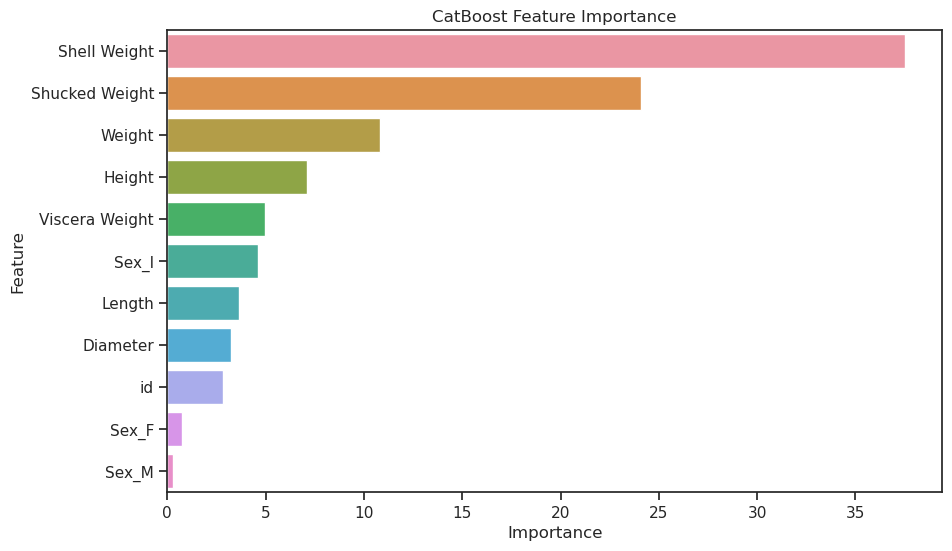

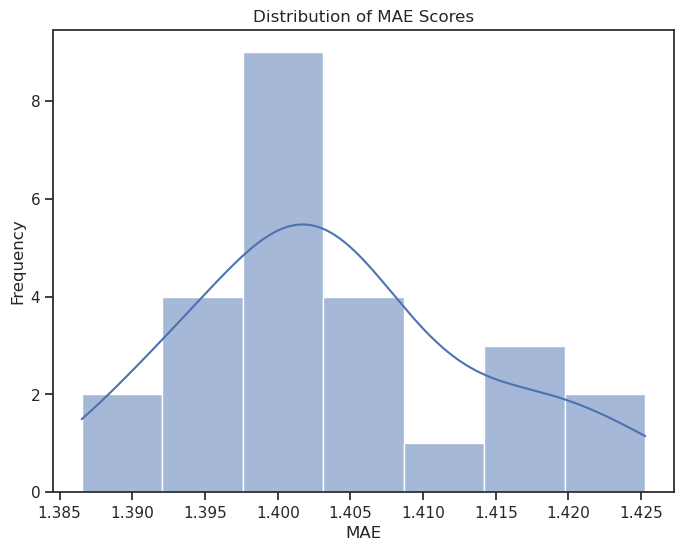

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance for CatBoost

cat_importance_avg = np.mean(importance_cat, axis=0)
cat_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': cat_importance_avg})
cat_importance_df = cat_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=cat_importance_df)
plt.title('CatBoost Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize the distribution of MAE scores
plt.figure(figsize=(8, 6))
sns.histplot(cv_scores_cat, kde=True)
plt.title('Distribution of MAE Scores')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.show()


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">These data visulaization tell us the <span style="color:crimson;">Feature Importance and Mean Distibution</span> using Cat.</p><br>

***

<div style="font-family:verdana; word-spacing:1.5px;">
    <h1 id="image">
         <span style="color:crimson;">(b) Its time for LBG</span>
    </h1>
    <br>

In [21]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
import lightgbm as lgb

cv_scores_lgb = []
importance_lgb = []

# Assuming 'train_df' is your DataFrame, and 'Age' is your target column
X = train_data.drop('Age', axis=1)
Y = train_data['Age']

## Running 5-fold CV
for i in range(5):
    print(f'\nIteration {i+1} begins')
    kf = KFold(n_splits=5, shuffle=True, random_state=i)
    
    for train_idx, test_idx in kf.split(X, Y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        Y_train, Y_test = Y.iloc[train_idx], Y.iloc[test_idx]
        
        lgb_model = lgb.LGBMRegressor(random_state=42, silent=True)
        lgb_model.fit(X_train, Y_train)
        importance_lgb.append(lgb_model.feature_importances_)
        
        lgb_pred = lgb_model.predict(X_test)
        mae = mean_absolute_error(Y_test, lgb_pred)
        cv_scores_lgb.append(mae)
        print(f'Iteration {i+1} done. MAE: {mae:.5f}')

avg_mae = sum(cv_scores_lgb) / len(cv_scores_lgb)
print(f'\nThe average MAE over 5 iterations is: {avg_mae:.5f}')



Iteration 1 begins
Iteration 1 done. MAE: 1.39870
Iteration 1 done. MAE: 1.38658
Iteration 1 done. MAE: 1.41911
Iteration 1 done. MAE: 1.39035
Iteration 1 done. MAE: 1.42095

Iteration 2 begins
Iteration 2 done. MAE: 1.39464
Iteration 2 done. MAE: 1.40048
Iteration 2 done. MAE: 1.39972
Iteration 2 done. MAE: 1.40110
Iteration 2 done. MAE: 1.41812

Iteration 3 begins
Iteration 3 done. MAE: 1.39558
Iteration 3 done. MAE: 1.40401
Iteration 3 done. MAE: 1.39204
Iteration 3 done. MAE: 1.41163
Iteration 3 done. MAE: 1.41008

Iteration 4 begins
Iteration 4 done. MAE: 1.40768
Iteration 4 done. MAE: 1.41514
Iteration 4 done. MAE: 1.40221
Iteration 4 done. MAE: 1.39780
Iteration 4 done. MAE: 1.39059

Iteration 5 begins
Iteration 5 done. MAE: 1.40183
Iteration 5 done. MAE: 1.40587
Iteration 5 done. MAE: 1.40065
Iteration 5 done. MAE: 1.40075
Iteration 5 done. MAE: 1.40957

The average MAE over 5 iterations is: 1.40301


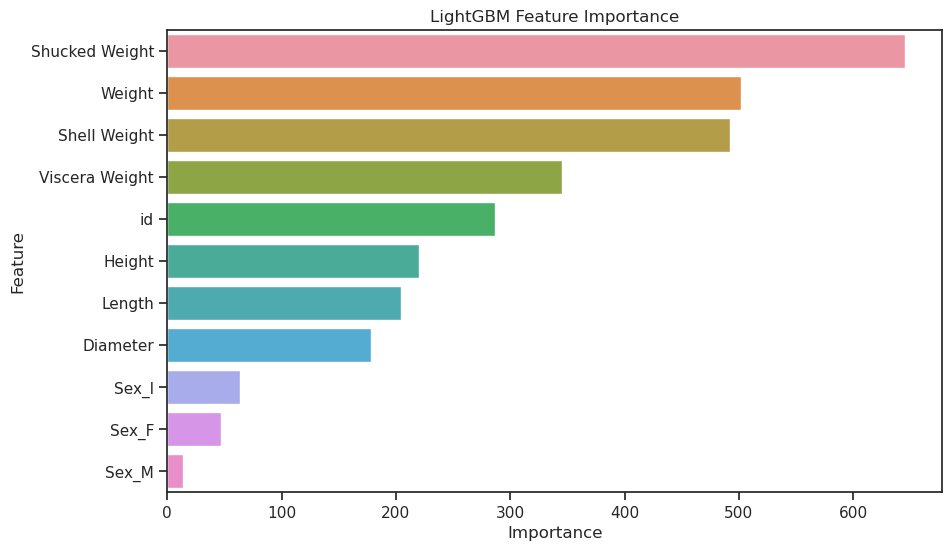

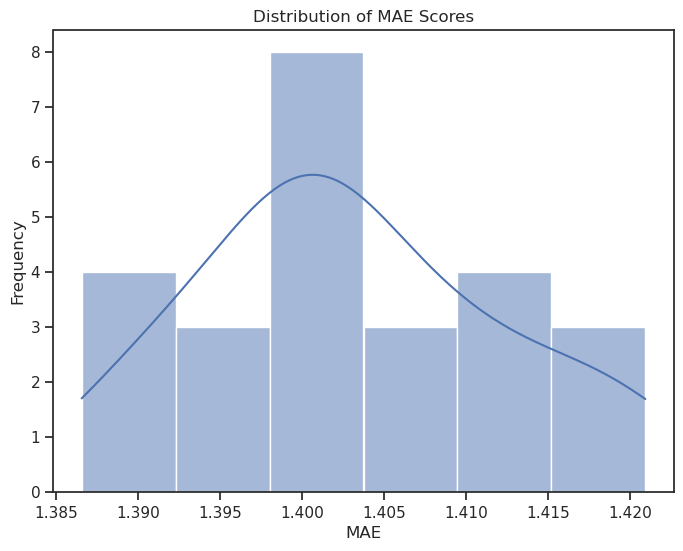

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize feature importance for LightGBM
lgb_importance_avg = np.mean(importance_lgb, axis=0)
lgb_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': lgb_importance_avg})
lgb_importance_df = lgb_importance_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=lgb_importance_df)
plt.title('LightGBM Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Visualize the distribution of MAE scores
plt.figure(figsize=(8, 6))
sns.histplot(cv_scores_lgb, kde=True)
plt.title('Distribution of MAE Scores')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.show()


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">These data visulaization tell us the <span style="color:crimson;">Feature Importance and Mean Distibution</span> using LGB.</p><br>

***

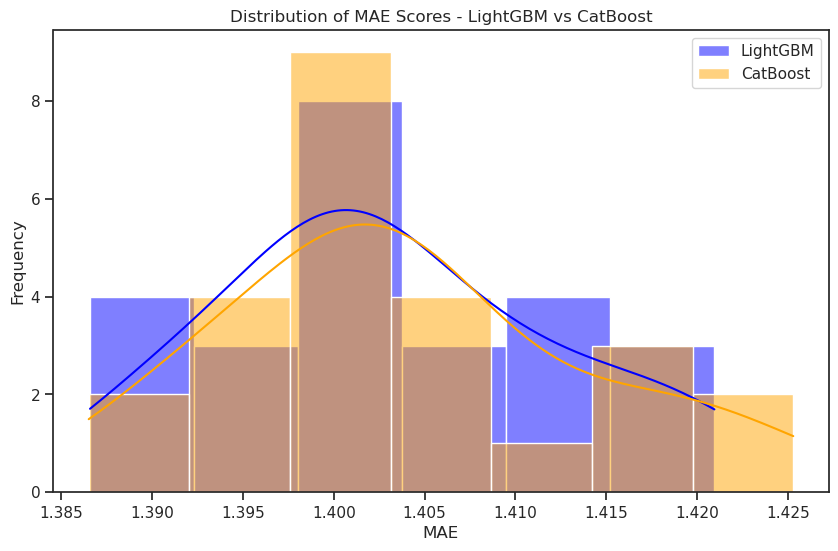

Average MAE - LightGBM: 1.40301
Average MAE - CatBoost: 1.40393


In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(cv_scores_lgb, kde=True, color='blue', label='LightGBM')
sns.histplot(cv_scores_cat, kde=True, color='orange', label='CatBoost')
plt.title('Distribution of MAE Scores - LightGBM vs CatBoost')
plt.xlabel('MAE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate and compare the average MAE scores

avg_mae_lgb = sum(cv_scores_lgb) / len(cv_scores_lgb)
avg_mae_cat = sum(cv_scores_cat) / len(cv_scores_cat)
print(f'Average MAE - LightGBM: {avg_mae_lgb:.5f}')
print(f'Average MAE - CatBoost: {avg_mae_cat:.5f}')


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">These data visulaization tell us the <span style="color:crimson;">Distribution of MAE Scores - LightGBM vs CatBoost</span></p><br>

<h1 style="font-family:verdana;"> <center>6. Conclusion</center> </h1>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Our CV results using CatBoost and LightGBM models are slightly better than the benchmark, which is a positive outcome. However, there is still room for improvement in this code and EDA notebook. Consider techniques like hyper-parameter tuning, feature selection, and feature generation to enhance the model further. These approaches can optimize your model's performance and provide valuable insights. Keep refining the code and analysis to achieve even better results! <span style="color:crimson;"></span></p><br>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 10px;
              color:white;">
            If this notebook, helped you in any way, help me win my first medal !!
            <br><br>
            With regards
            <br>
            Fellow Kaggler
    </div>
    </p>
</div>
<br><br>

<p style="font-size:15px; font-family:verdana; line-height: 1.7em"> Honerable Mention: <span style="color:crimson;">DATAMANYO</span> for Xgb.</p><br>

[Here's her notebook](https://www.kaggle.com/code/kimtaehun/crab-age-prediction-with-eda-and-xgb-baseline).